<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[6차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ ROI (Region of Image)를 자르고 표시하는 방법에 대해 학습한다.<br>
○ 한글을 출력하는 방법에 대해 학습한다.<br>
○ 비트 연산 및 크로마 키(Chroma key) 합성으로 이미지를 합성하는 방법을 학습한다.

</font></td></tr>   
</table>

# 픽셀/블록 기반 이미지 처리

## ROI (Region of Image) 자르기

- ROI (Region of Image) 
   - 관심영역 - 이미지에 우리가 필요한 부분 (얼굴, 눈 ...)
   
<img src="./lecture_image/06_roi.png" width=30%>  


- <font color=red>img[200:370, 200:350]</font>

<img src="./lecture_image/06_roi2.png" width=60%>  


In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/news_paper.jpg",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# img2 = img[y좌표 , x좌표]
# numpy array는 행부터 표시하기때문에 y부터
img2 = img[628:826, 463:619]

plt.xticks([]),plt.yticks([])
plt.imshow(img)
plt.show()
plt.xticks([]),plt.yticks([])
plt.imshow(img2)
plt.show()

## ROI에 도형 그리기

- <font color=red>cv2.line(배경이미지, 시작점좌표, 끝점좌표, 색상, 선두께)</font> : 직선 그리기

<img src="./lecture_image/06_line.png" width=40%>  

In [ ]:
img = cv2.imread("./image/lenna.png",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# cv2.line(img,(180,180),(380,180),(250,0,0),4)
cv2.line(img,(263,244),(295,255),(250,0,0),4)
cv2.line(img,(328,255),(355,248),(250,0,0),4)


plt.xticks([]),plt.yticks([])
plt.imshow(img)
plt.show()

- <font color=red>cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께)</font> : 원 그리기

<img src="./lecture_image/06_circle.png" width=20%>  

In [ ]:
img = cv2.imread("./image/lenna.png",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.circle(img, (265,265), 20, (0,255,0),3)
# 두께를 -1로 하면 채운 원이 출력
img = cv2.circle(img, (325,265), 20, (0,255,0),-1)

plt.xticks([]),plt.yticks([])
plt.imshow(img)
plt.show()

- <font color=red>cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께)</font> : 사각형 그리기

<img src="./lecture_image/06_rectangle.png" width=30%>  

In [ ]:
img = cv2.imread("./image/lenna.png",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.rectangle(img, (200,200),(350,370), (0,255,0),1)

plt.xticks([]),plt.yticks([])
plt.imshow(img)
plt.show()

- <font color=red>cv2.ellipse(배경이미지, 중심좌표, 장축/단축 반지름, 기울기, 호의시작각, 호의 종료각, 색상, 선두께)</font> : 타원 그리기

<img src="./lecture_image/06_ellipse.png" width=30%>  

In [ ]:
img = cv2.imread("./image/lenna.png",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.ellipse(img, (285,290), (70,90), 0, 0, 360, (0,255,0),3)

plt.xticks([]),plt.yticks([])
plt.imshow(img)
plt.show()

- <font color=red>cv2.putText(배경이미지, 출력내용, 출력시작좌표, 폰트, 크기, 색상, 굵기)</font> : 텍스트 그리기

<img src="./lecture_image/06_text.png" width=30%>  

In [ ]:
img = cv2.imread("./image/lenna.png",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.rectangle(img, (200,200),(350,370), (0,255,0),1)
img = cv2.putText(img, "Lenna", (200,190), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),4)

plt.xticks([]),plt.yticks([])
plt.imshow(img)
plt.show()

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 이미지에 ROI 영역을 표시하고 이름을 출력해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/06_ryan.png" width=20%></td></tr>   
</table>

## 한글 출력하기

- c:/Windows/Fonts 폴더에서 사용할 폰트를 현재 폴더에 fonts 폴더를 생성하고 복사한다


- <font color=red>font = ImageFont.truetype("fonts/gulim.ttc", 30)</font> : 사용할 폰트와 크기를 가져온다

- <font color=red>img_pil = Image.fromarray(img)</font> : array 이미지를 PIL 이미지로 변환

- <font color=red>draw = ImageDraw.Draw(img_pil)</font> : PIL 이미지를 그림

- <font color=red>draw.text((200, 20), "레나 이미지", font=font, fill=(0, 0, 255, 0))</font> : 이미지에 텍스트를 그림

- <font color=red>img = np.array(img_pil)</font> : PIL 이미지를 numpy 배열로 변환

In [ ]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("./image/lenna.png",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 폰트 가져오기
font = ImageFont.truetype("./image/NanumGothic.ttf",30)
# 1. 원본 이미지(numpy array)를 이미지 타입으로 변경
img_pil = Image.fromarray(img)
# 2. 변환된 이미지를 캔버스에 그려준다
draw = ImageDraw.Draw(img_pil)
# 3. 폰트를 이미지에 그려준다.
# 시작좌표, 출력내용, 폰트, 색상(R G B A(투명도))
draw.text((200,200), "레나", font=font, fill=(0,0,255,0))

# matplotlib으로 출력하기 위해 다시 numpy array로 변환
img = np.array(img_pil)

plt.imshow(img)

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 다른 폰트의 한글을 출력해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/06_ryan2.png" width=20%></td></tr>   
</table>

# 이미지 합성하기

## 비트 연산을 이용해서 합성하기

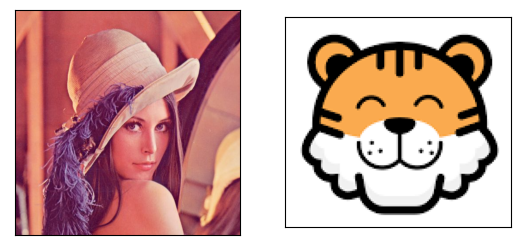

In [20]:
import cv2
import matplotlib.pyplot as plt

# 원본이미지
img = cv2.imread("./image/lenna.png",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 원본이미지에 합성할 이미지
img_tiger = cv2.imread("./image/tiger.png",cv2.IMREAD_COLOR)
img_tiger = cv2.cvtColor(img_tiger,cv2.COLOR_BGR2RGB)


plt.subplot(1,2,1)
plt.xticks([]),plt.yticks([])
plt.imshow(img)
plt.subplot(1,2,2)
plt.xticks([]),plt.yticks([])
plt.imshow(img_tiger)

In [21]:
img_tiger.shape

(123, 132, 3)

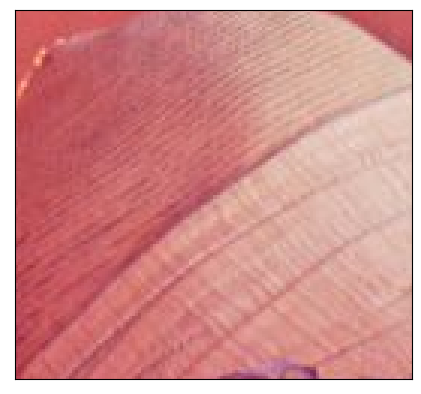

In [9]:
# 이미지를 올릴위치의 원본부분을 잘라낸다
rows, cols, channels = img_tiger.shape
roi = img[50:rows+50, 150:cols+150]

plt.xticks([]),plt.yticks([])
plt.imshow(roi)

- <font color=red>cv2.bitwise_not(mask)</font>
  - mask는 흑백이미지여야 함
  - 0을 255로 255롤 0으로 변환 (반전)

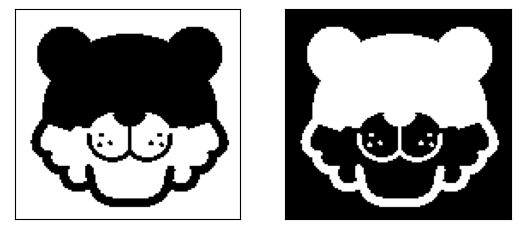

In [31]:
img_tiger_gray = cv2.cvtColor(img_tiger,cv2.COLOR_RGB2GRAY)
_, th_img = cv2.threshold(img_tiger_gray, 200,255,cv2.THRESH_BINARY)

plt.subplot(1,2,1)
plt.xticks([]),plt.yticks([])
plt.imshow(th_img, cmap='gray')

# 반전이미지
inv_img = cv2.bitwise_not(th_img)

plt.subplot(1,2,2)
plt.xticks([]),plt.yticks([])
plt.imshow(inv_img, cmap='gray')

- <font color=red>cv2.bitwise_and(src1, src2, mask)></font> : mask의 값이 아닌 부분만 src1과 src2를 AND 연산
  - mask는 흑백이미지여야 함
  - mask 값이 0인 부분 (검정)은 연산되지 않고 검정색 부분 그대로 놓여짐

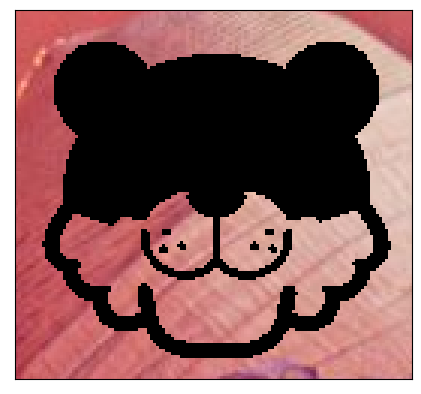

In [24]:
# 합성할 이미지가 들어간 공간을 만듬
img_bg = cv2.bitwise_and(roi,roi,mask=th_img)

plt.xticks([]),plt.yticks([])
plt.imshow(img_bg, cmap='gray')

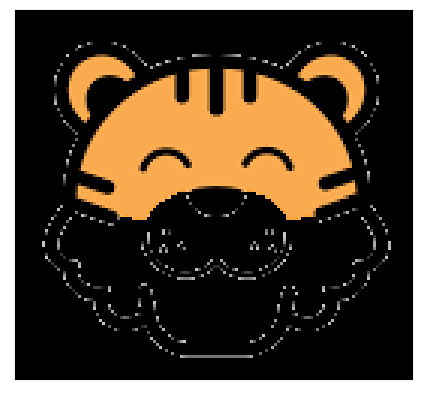

In [28]:
# 호랑이 이미지에서 원본 이미지에 올라갈 부분만 추출
img_fg = cv2.bitwise_and(img_tiger,img_tiger,mask=inv_img)

plt.xticks([]),plt.yticks([])
plt.imshow(img_fg, cmap='gray')

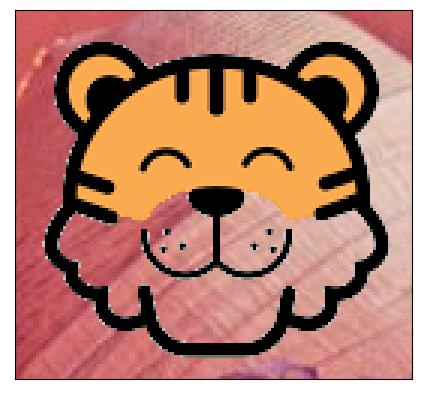

In [29]:
#bg_img에 fg_img 를 합성해보자
img_fin = cv2.add(img_bg,img_fg)

plt.xticks([]),plt.yticks([])
plt.imshow(img_fin, cmap='gray')

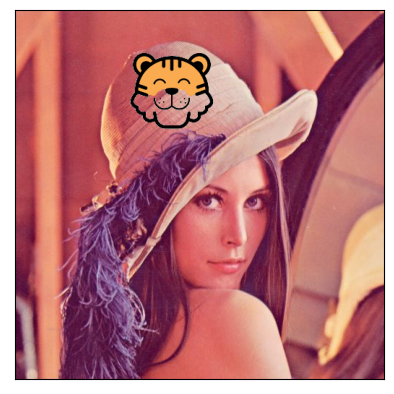

In [30]:
# 원본 이미지에 bg_img를 합성
img[50:rows+50, 150:cols+150] = img_fin

plt.xticks([]),plt.yticks([])
plt.imshow(img, cmap='gray')

<table border=1>
    <tr><td colspan=3 style="border: 1px solid black; width:600px; text-align: left;">
        <font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=2>○ 다음과 같이 2개의 이미지를 합성해보자.</font></td></tr> 
    <tr>
        <td style="border: 1px solid black;">
        <img src="./lecture_image/ryan_cap2.png" width=80%></td>        
    </tr>       
</table>

In [24]:
img.shape

(625, 363, 3)

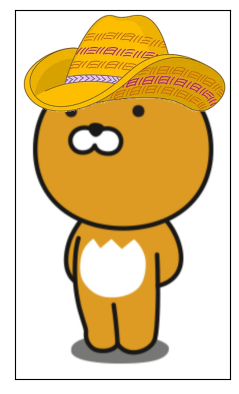

In [29]:
import cv2
import matplotlib.pyplot as plt
# 원본 이미지
img = cv2.imread("image/ryan.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 합성할 이미지
img2 = cv2.imread("image/cap.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# 마스크 패턴 만들기 (이진 이미지)
mask2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
_, mask_b =  cv2.threshold(mask2gray, 250, 255, cv2.THRESH_BINARY)
# 마스크 이미지 반전 - 흰색부분이 마스크가 되도록하기 위해서
mask_b_inv = cv2.bitwise_not(mask_b)
# 마스크 이미지와 동일한 크기로
# cap 이미지를 붙일 위치의 원본 이미지 잘라내기 (ROI)
rows, cols, channels = img2.shape
roi = img[10:rows+10, 15:cols+15]

# ROI 이미지에서 마스크 부분만 추출하기
img_bg = cv2.bitwise_and(roi, roi, mask=mask_b)
# 마스크에 해당하는 이미지만 추출하기
img_fg = cv2.bitwise_and(img2, img2, mask=mask_b_inv)
# ROI 이미지에 마스크 이미지 합하기
bg_fg = cv2.add(img_bg, img_fg)
# 배경이미지에 해당 위치에 합한 이미지 붙이기
img[10:rows+10, 15:cols+15] = bg_fg
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

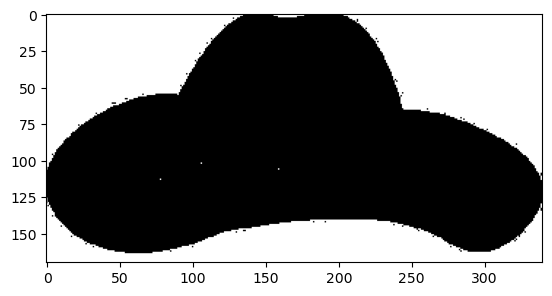

In [36]:
plt.imshow(mask_b, cmap='gray')

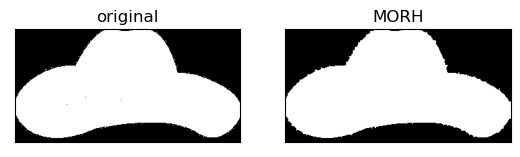

In [52]:
import numpy as np
kernel = np.ones((3,3), np.uint8)

plt.subplot(1,2,1)

plt.xticks([]), plt.yticks([])
plt.title('original')
plt.imshow(mask_b_inv, cmap='gray')

result_close = cv2.morphologyEx(mask_b_inv, cv2.MORPH_CLOSE, kernel)


plt.subplot(1,2,2)

plt.xticks([]), plt.yticks([])
plt.title('MORH')
plt.imshow(result_close, cmap='gray')

In [ ]:
img_tiger_gray = cv2.cvtColor(img_tiger,cv2.COLOR_RGB2GRAY)
_, th_img = cv2.threshold(img_tiger_gray, 200,255,cv2.THRESH_BINARY)

plt.subplot(1,2,1)
plt.xticks([]),plt.yticks([])
plt.imshow(th_img, cmap='gray')

# 반전이미지
inv_img = cv2.bitwise_not(th_img)

plt.subplot(1,2,2)
plt.xticks([]),plt.yticks([])
plt.imshow(inv_img, cmap='gray')

## 크로마 키(Chroma key) 합성

- 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술

In [ ]:
#실습

In [ ]:
#실습

In [ ]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[6차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=2>
○ ROI (Region of Image) : 관심영역을 의미<br>
○ line() - 선그리기<br> 
○ circle() - 원 그리기<br> 
○ rectangle() - 사각형 그리기<br> 
○ ellipse() - 타원 그리기<br> 
○ putText() - 문자 출력<br>

○ bitwise_not() : 반전 연산<br>
○ bitwise_and() : AND 연산<br>
○ add() : 2개 이미지 합치기<br>

○ 크로마 키 합성 : 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술<br>

○ copyTo() : 녹색 영역에 다른 영역 배경을 합성하기            
        </font></td></tr>   
</table>